# MAJOR PROJECT

# Used Car Price Prediction 

    PROBLEM STATEMENT
    ----------------------------------------------
    ----------------------------------------------
    You will be predicting the costs of used cars given the data collected from various sources and distributed across
    various locations in India.

    Features
    ----------------------------------------------
    Name                : The brand and model of the car.
    Location            : The location in which the car is being sold or is available for purchase.
    Year                : The year or edition of the model.
    Kilometers_Driven   : The total kilometres driven in the car by the previous owner(s) in KM.
    Fuel_Type           : The type of fuel used by the car.
    Transmission        : The type of transmission used by the car.
    Owner_Type          : Whether the ownership is Firsthand, Second hand or other.
    Mileage             : The standard mileage offered by the car company in kmpl or km/kg
    Engine              : The displacement volume of the engine in cc.
    Power               : The maximum power of the engine in bhp.
    Seats               : The number of seats in the car.
    Price               : The price of the used car in INR Lakhs.

    Tasks
    ----------------------------------------------
    1. Clean Data (Null value removal, Outlier identification)
    2. Null Values (Dropping the rows /Columns and what is the reason or how you are imputing the null).
    3. EDA (Minor Project to understand the relations, repeat the same here)
    4. Handle Categorical Variable (Using Label Encoding/One hot encoding)
    5. Try to do data scaling for Kilometers driven
    6. Do the train test split
    7. Apply different ML regression Algorithms
    8. Calculate the error metrics.

# SOLUTION

1st importing the libraries that are required here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we have to read the Dataset.

In [2]:
data = pd.read_excel('Data_Train.xlsx')

data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [3]:
data.shape

(6019, 12)

In the above mentioned dataset, we have 6019 rows and 12 Columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


The codes gives the details of the given Dataframe:

1.Class Data Frame

2.Range Index which has 6019 entries and the total no.of values are 0 to 6018.

3.The Dataframe which has eight columns
   1. Name 
   2. Location
   3. Kilometers Driven
   4. Fuel type
   5. Transmission
   6. Owner type
   7. Mileage
   8. Engine
   9. Power
   10. Seats
   11. Price
   
            
4.This also show how many non-null items are present for every columns and their Data Types.

5.It gives the summary on Data Types(2nos.-int64 and 8nos.-object and 2nos.-float64).

6.And the memory consumption details i.e, 564.4+ KB.

In [5]:
data.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

All the column names has been printed in the form of list.

In [6]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Here we can see there are 2 null values in Mileage, 36 null values in Engine , 36 null values in Power and 42 null values in Seats.

   - Mileage has km/kg and kmpl
   - Engine has CC
   - Power has bhp
    
    By removing these, 
    it would be possible to convert them 
    from 'object' to 'int/float'

But before that the missing values need to be dealt with.

In [7]:
# getting column names for all the fields with missing values

columns_with_missing_value = [column for column in data.columns
                             if data[column].isnull().any()]

print(columns_with_missing_value)

['Mileage', 'Engine', 'Power', 'Seats']


In [8]:
data.dropna(subset=['Mileage', 'Engine', 'Power', 'Seats'],how= 'all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [9]:
data.shape

(6019, 12)

In [10]:
data.dropna(subset=['Engine','Power', 'Seats'],how= 'all',inplace= True)

In [11]:
data.shape

(5983, 12)

In [12]:
data.reset_index(inplace=True)
data.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Here we can see, there are some rows where 3 if the columns are missing. So we remove those rows for better understanding of the dataset.

In [13]:
data.drop('index',axis=1,inplace= True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


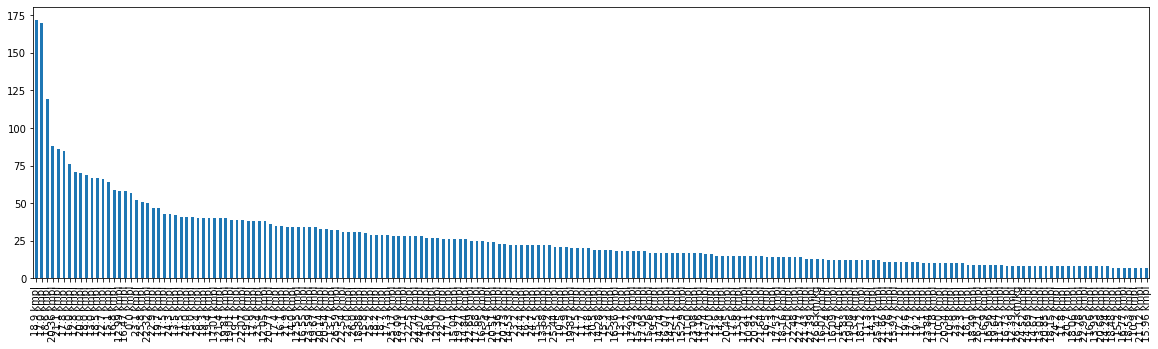

In [14]:
# Mileage

# visualizing data for a better approach

plt.figure(figsize = (20, 5))
data['Mileage'].value_counts().head(200).plot.bar()     # 200 is a magic number used for the sole purpose of testing and doesn't hold any 'set' meaning
plt.show()

In [15]:
# filling with the most frequent value i.e. 17.0 kmpl from the above graph
data['Mileage'] = data['Mileage'].fillna('17.0 kmpl')

# some values have are 0.0kmpl which is equivalent to null value, thus changing that as well
data['Mileage'] = data['Mileage'].replace('0.0 kmpl', '17.0 kmpl')

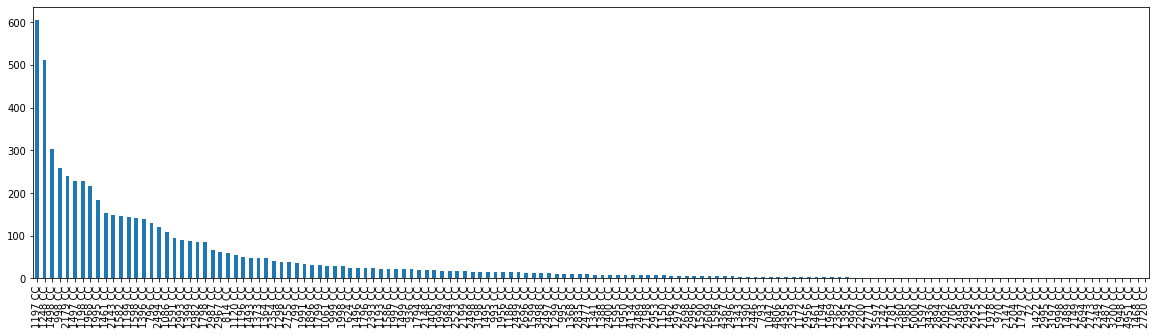

In [16]:
# Engine

# visualizing data for a better approach

plt.figure(figsize = (20, 5))
data['Engine'].value_counts().head(200).plot.bar()     # 200 is a magic number used for the sole purpose of testing and doesn't hold any 'set' meaning
plt.show()

In [17]:
# filling with the most frequent value i.e. 1197 CC from the above graph
data['Engine'] = data['Engine'].fillna('1197 CC')

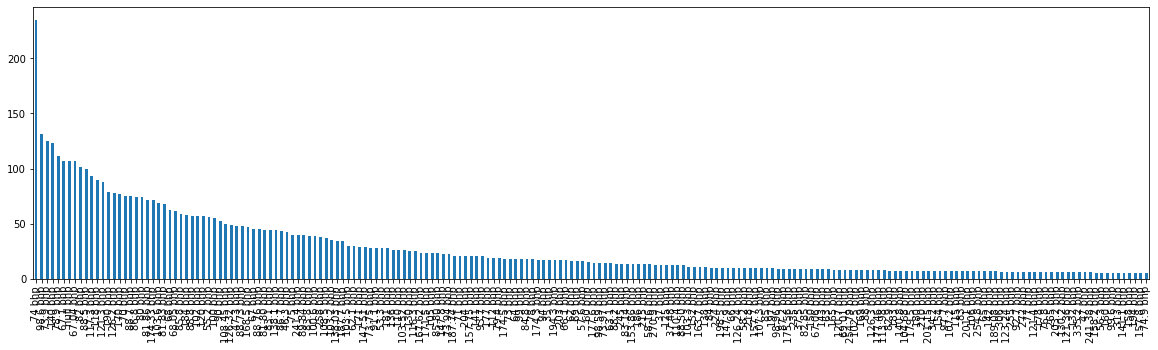

In [18]:
# Power

# visualizing data for a better approach

plt.figure(figsize = (20, 5))
data['Power'].value_counts().head(200).plot.bar()     # 200 is a magic number used for the sole purpose of testing and doesn't hold any 'set' meaning
plt.show()

In [19]:
# filling with the most frequent value i.e. 74 bhp from the above graph
data['Power'] = data['Power'].fillna('74 bhp')

# also, some rows have 'null bhp' as their values which is as problematic as NaN as they will create problems at the time of LabelEncoding i.e. changing from 'object' to 'int/float'
# thus, replacing them with the most frequent value.
data['Power'] = data['Power'].replace('null bhp', '74 bhp')

In [20]:
# Seats

# filling with the mean value
data['Seats'].fillna(data['Seats'].mean(), inplace = True)

In [21]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [22]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5983.000000,5.983000e+03,5983.000000,5983.000000
mean,2013.383085,5.868418e+04,5.278735,9.496263
std,3.249102,9.150334e+04,0.808434,11.200462
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.396550e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [23]:
# Mileage

data.Mileage.str.replace('km/kg', '').str.replace('kmpl', '').astype(float)

0       26.60
1       19.67
2       18.20
3       20.77
4       15.20
5       21.10
6       23.08
7       11.36
8       20.54
9       22.30
10      21.56
11      16.80
12      25.20
13      12.70
14      17.00
15      13.50
16      25.80
17      28.40
18      20.45
19      14.84
20      22.69
21      23.65
22      13.53
23      18.50
24      14.40
25      16.80
26      23.08
27      20.92
28      17.50
29      12.80
        ...  
5953    18.25
5954    13.93
5955    22.90
5956    13.70
5957    16.30
5958    17.00
5959    19.87
5960    16.36
5961    26.20
5962    17.24
5963    17.57
5964    18.50
5965    17.68
5966    16.09
5967    23.10
5968    15.30
5969    24.30
5970     8.70
5971    19.30
5972    17.85
5973    19.16
5974    18.50
5975    17.00
5976    12.80
5977    25.80
5978    28.40
5979    24.40
5980    14.00
5981    18.90
5982    25.44
Name: Mileage, Length: 5983, dtype: float64

In [24]:
# Power

data.Power.str.replace('bhp', '').astype(float)

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
5        55.20
6        63.10
7       171.50
8       103.60
9        74.00
10      103.25
11      116.30
12       74.00
13      187.70
14      115.00
15      175.56
16       98.60
17       74.00
18       83.80
19      167.62
20      190.00
21       88.50
22      177.01
23       80.00
24      103.60
25      116.30
26       63.10
27       67.10
28       88.70
29      102.00
         ...  
5953    187.74
5954    138.00
5955     74.00
5956    157.75
5957    147.50
5958    118.00
5959     83.80
5960    187.70
5961     58.20
5962     73.90
5963     88.70
5964     82.85
5965    174.33
5966    103.50
5967     67.04
5968     83.00
5969     88.50
5970    224.34
5971     73.90
5972    300.00
5973    158.20
5974     86.80
5975    262.60
5976    102.00
5977     98.60
5978     74.00
5979     71.00
5980    112.00
5981     67.10
5982     57.60
Name: Power, Length: 5983, dtype: float64

In [25]:
# Engine

data.Engine.str.replace('CC', '').astype(float)

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
5        814.0
6       1461.0
7       2755.0
8       1598.0
9       1248.0
10      1462.0
11      1497.0
12      1248.0
13      2179.0
14      2179.0
15      2477.0
16      1498.0
17      1248.0
18      1461.0
19      2143.0
20      1995.0
21      1248.0
22      1984.0
23      1197.0
24      1598.0
25      1497.0
26      1461.0
27       998.0
28      1199.0
29      2494.0
         ...  
5953    1968.0
5954    2179.0
5955    1248.0
5956    1798.0
5957    1797.0
5958    1497.0
5959    1461.0
5960    2179.0
5961     998.0
5962    1198.0
5963    1193.0
5964    1197.0
5965    1968.0
5966    1598.0
5967     998.0
5968    1341.0
5969    1248.0
5970    2987.0
5971    1248.0
5972    2967.0
5973    2494.0
5974    1198.0
5975    3597.0
5976    2494.0
5977    1498.0
5978    1248.0
5979    1120.0
5980    2498.0
5981     998.0
5982     936.0
Name: Engine, Length: 5983, dtype: float64

In [26]:
# Now we drop a columns which have at least 1 missing values
daata=data.dropna(axis = 1) 
daata

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [27]:
# making new data frame with dropped NA values  
new_data = daata.dropna(axis = 0, how ='any')  
new_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [28]:
print("Old data frame length:", len(data)) 
print("New data frame length:", len(new_data))  
print("Number of rows with at least 1 NA value: ", (len(data)-len(new_data))) 

Old data frame length: 5983
New data frame length: 5983
Number of rows with at least 1 NA value:  0


In [29]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 12 columns):
Name                 5983 non-null object
Location             5983 non-null object
Year                 5983 non-null int64
Kilometers_Driven    5983 non-null int64
Fuel_Type            5983 non-null object
Transmission         5983 non-null object
Owner_Type           5983 non-null object
Mileage              5983 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5983 non-null float64
Price                5983 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 607.6+ KB


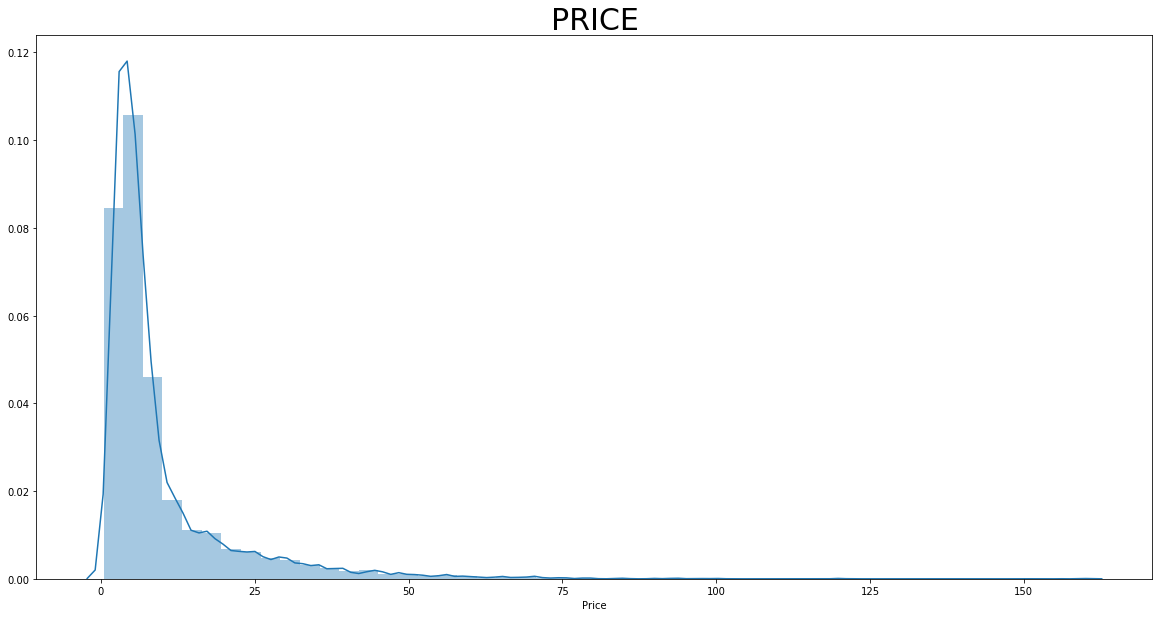

In [30]:
plt.rcParams['figure.figsize']=(20,10)
sns.distplot(new_data['Price'],kde= True)
plt.title('PRICE',fontsize=30)
plt.show()

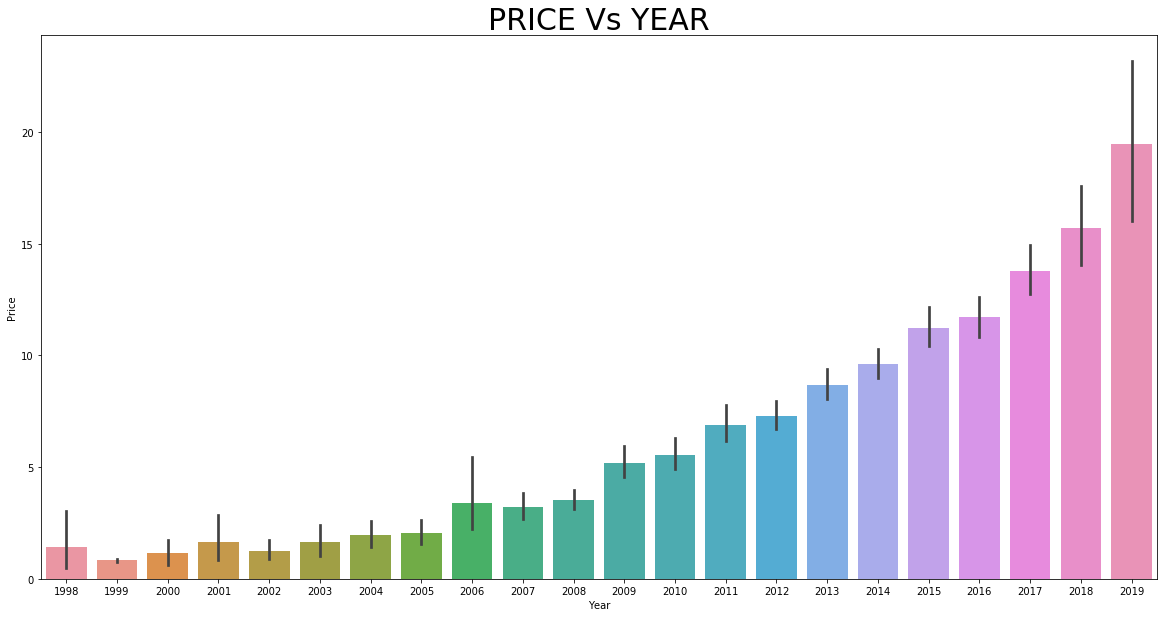

In [31]:
plt.title('PRICE Vs YEAR',fontsize=30)
sns.barplot(x='Year',y='Price',data=new_data)
plt.show()
#this is a bar plot with price on y axis and year on x axis. we can infer the price has reached the highest in the year 2019

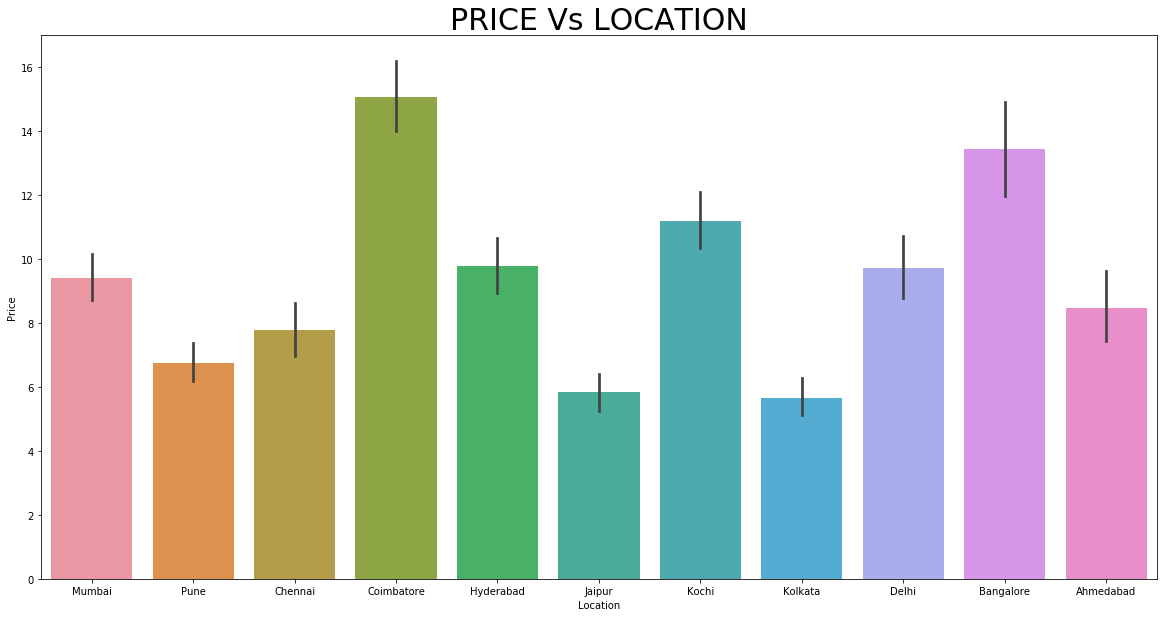

In [32]:
plt.title('PRICE Vs LOCATION',fontsize=30)
sns.barplot(x='Location',y='Price',data=new_data)
plt.show()
#this is a bar plot with price on y axis and location on x axis. we can infer the price is highest in coimbatore and lowest in kolkata 

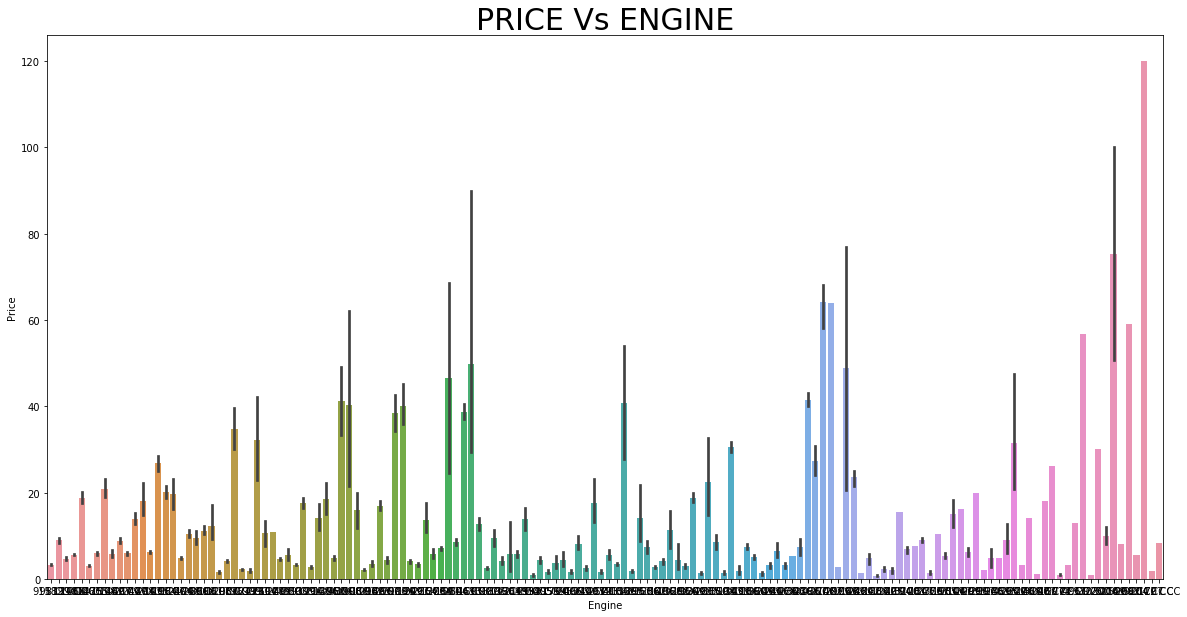

In [33]:
plt.rcParams['figure.figsize']=(20,10)
plt.title('PRICE Vs ENGINE',fontsize=30)
sns.barplot(x='Engine',y='Price',data=new_data)
plt.show()

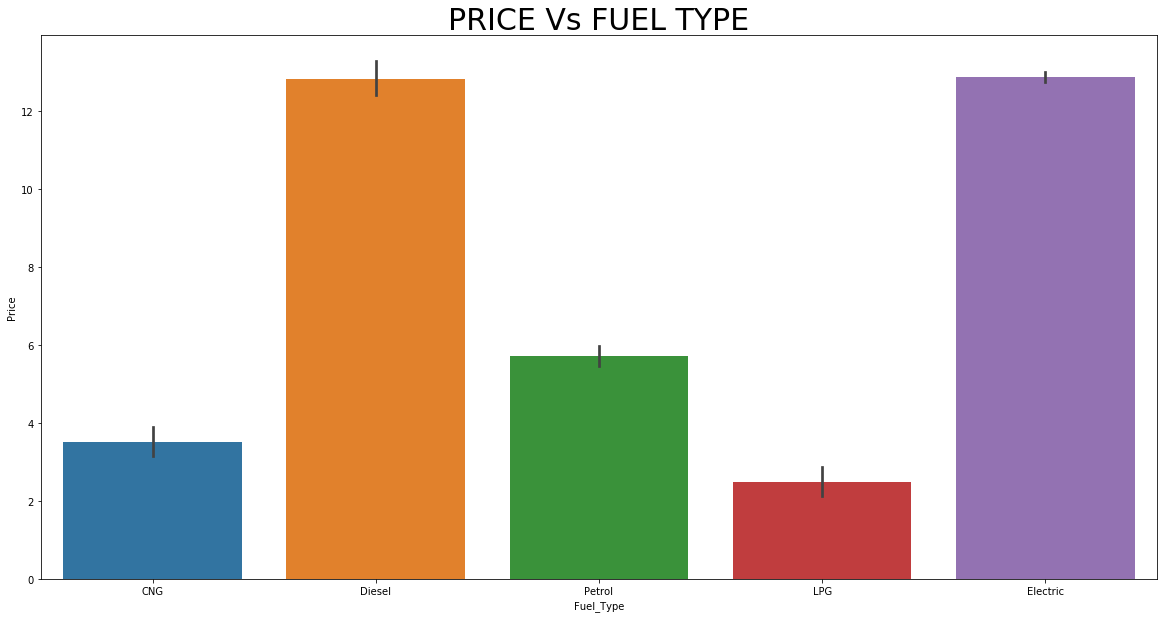

In [34]:
plt.title('PRICE Vs FUEL TYPE',fontsize=30)
sns.barplot(x='Fuel_Type',y='Price',data=new_data)
plt.show()
#this is a bar plot with price on y axis and fuel type on x axis. we can infer the price of electric car is most and LPG car is lowest 

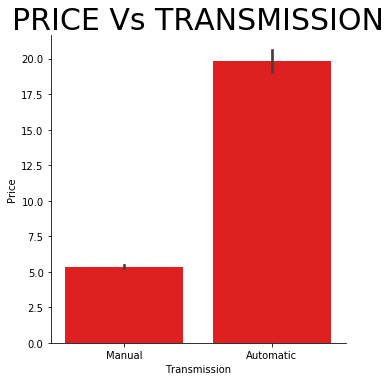

In [35]:
plt.rcParams['figure.figsize']=(30,10)
sns.catplot(x="Transmission",y='Price', kind="bar",color='r', data=new_data)
plt.title('PRICE Vs TRANSMISSION',fontsize=30)
plt.show()
#this is a bar plot with price on y axis and transmission on x axis. we can infer the price of automatic car is more than manual one 

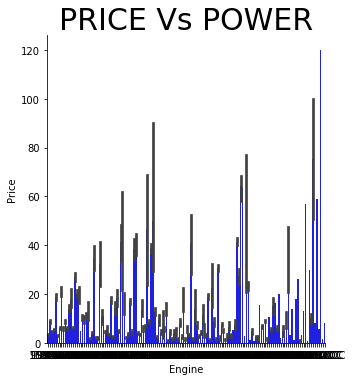

In [36]:
plt.rcParams['figure.figsize']=(30,10)
sns.catplot(x="Engine",y='Price', kind="bar",color='b', data=new_data)
plt.title('PRICE Vs POWER',fontsize=30)
plt.show()
#this is a bar plot with price on y axis and power on x axis. we can infer the price of car increases with power 

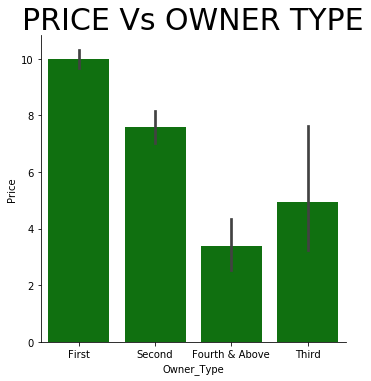

In [37]:
plt.rcParams['figure.figsize']=(30,10)
sns.catplot(x="Owner_Type",y='Price', kind="bar",color='g', data=new_data)
plt.title('PRICE Vs OWNER TYPE',fontsize=30)
plt.show()
#this is a bar plot with price on y axis and power on x axis. we can infer the price of car is highest for first hand cars and lowest for fourth and above  

Now, lets divide the dataframe into two Dataframes : numF- Containing all the numerical features and catF- Containing all the categorical features.

In [38]:
numF=new_data.select_dtypes(include=[np.number])
numF.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [39]:
catF=new_data.select_dtypes(include=[np.object])
catF.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [40]:
t=new_data['Name'].str.split()
compName=t.str[0]
new_data['Comp_Name']=pd.Series(compName)
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [41]:
data['Name'].unique().size

1860

In [42]:
new_data['Comp_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Observations:



1.   We don't know company names like Land, Force and Mini.
2.   Company names like Isuzu appear twice.

So, Let's fix that.

In [43]:
cn=new_data['Comp_Name'].values
cn

array(['Maruti', 'Hyundai', 'Honda', ..., 'Mahindra', 'Maruti',
       'Chevrolet'], dtype=object)

In [44]:
new_data.loc[new_data['Comp_Name']=='Land']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,17.0 kmpl,2179 CC,115 bhp,5.0,17.50,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,Land
309,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,44.00,Land
397,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,30.00,Land
402,Land Rover Range Rover 2.2L Prestige,Coimbatore,2017,34990,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,53.83,Land
408,Land Rover Range Rover 2.2L Pure,Coimbatore,2014,95649,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,29.67,Land
478,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,33.50,Land
519,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,45.64,Land
699,Land Rover Freelander 2 SE,Chennai,2011,109000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,16.50,Land


In [45]:
for i in range(new_data.shape[0]):
  if (cn[i]=='Land'):
    cn[i]='Land Rover'
  if (cn[i]=='ISUZU'):
    cn[i]='Isuzu'
  if (cn[i]=='Mini'):
    cn[i]='Mini Cooper'
  if (cn[i]=='Force'):
    cn[i]='Force One LX'

In [46]:
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Comp_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [47]:
new_data.drop('Comp_Name',axis=1,inplace=True)
new_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [48]:
new_data.insert(column='Comp_name',value=cn,loc=1)
new_data.head()

,Name,Comp_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Now that we have extracted the Company names , let's analyse it.

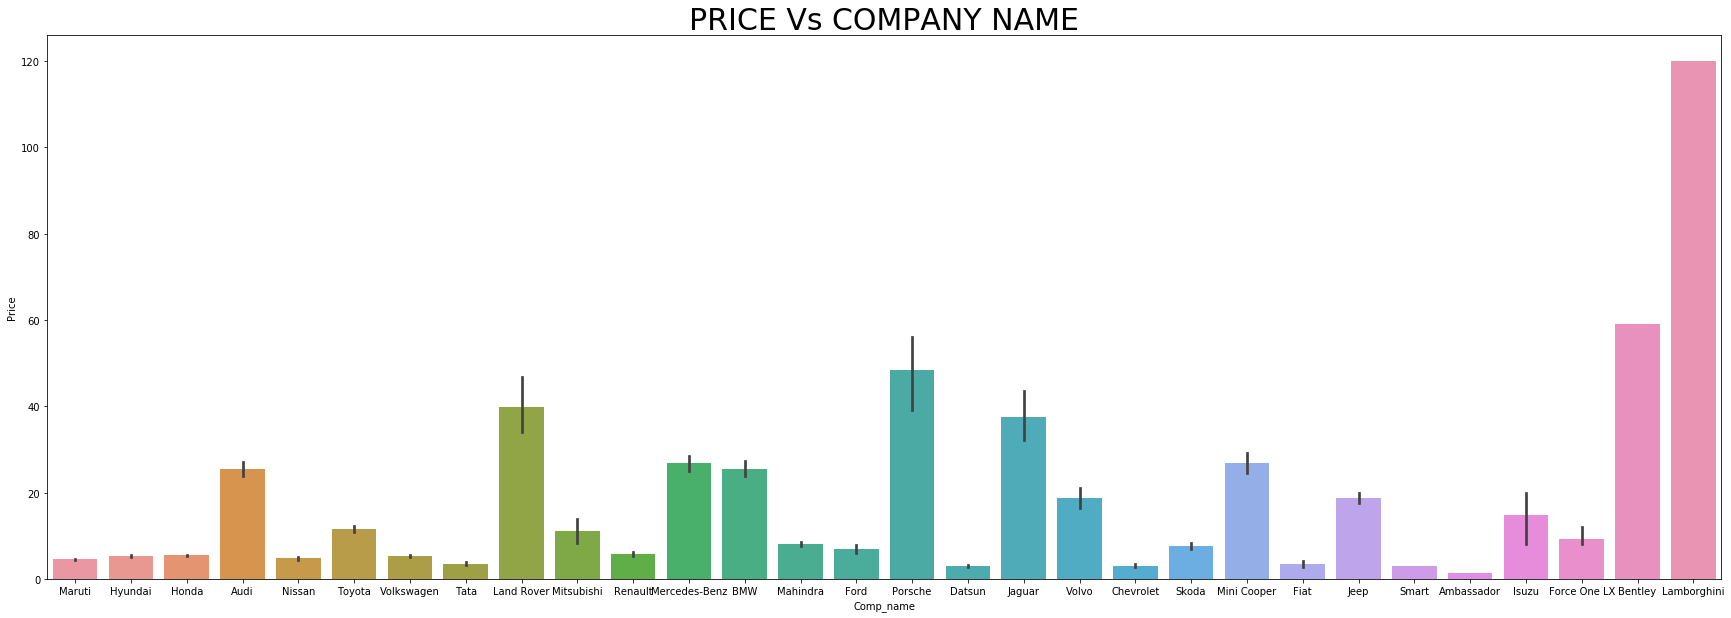

In [49]:
plt.title('PRICE Vs COMPANY NAME',fontsize=30)
sns.barplot(x='Comp_name',y='Price',data=new_data)
plt.show()

In [50]:
data=new_data

In [51]:
#converting 'Engine' values from object to float

arre=[]
for elem in data.Engine.str.split().str.get(0):
    arre.append(int(elem))
print(type(arre[0]))

<class 'int'>


In [52]:
data['Engine']=arre
data.head(10)

,Name,Comp_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Nissan,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Toyota,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Volkswagen,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Tata,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248,74 bhp,5.0,1.95


In [53]:
#converting 'Mileage' values from object to float

arrm=[]
for elem in data.Mileage.str.split().str.get(0):
    arrm.append(float(elem))
print(type(arrm[0]))

<class 'float'>


In [54]:
data['Mileage']=arrm
data.head()

,Name,Comp_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74


In [55]:
#converting 'Power' values from object to float

arrp=[]
for elem in data.Power.str.split().str.get(0):
    arrp.append(float(elem))
print(type(arrp[0]))

<class 'float'>


In [56]:
data['Power']=arrp
data.head()

,Name,Comp_name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


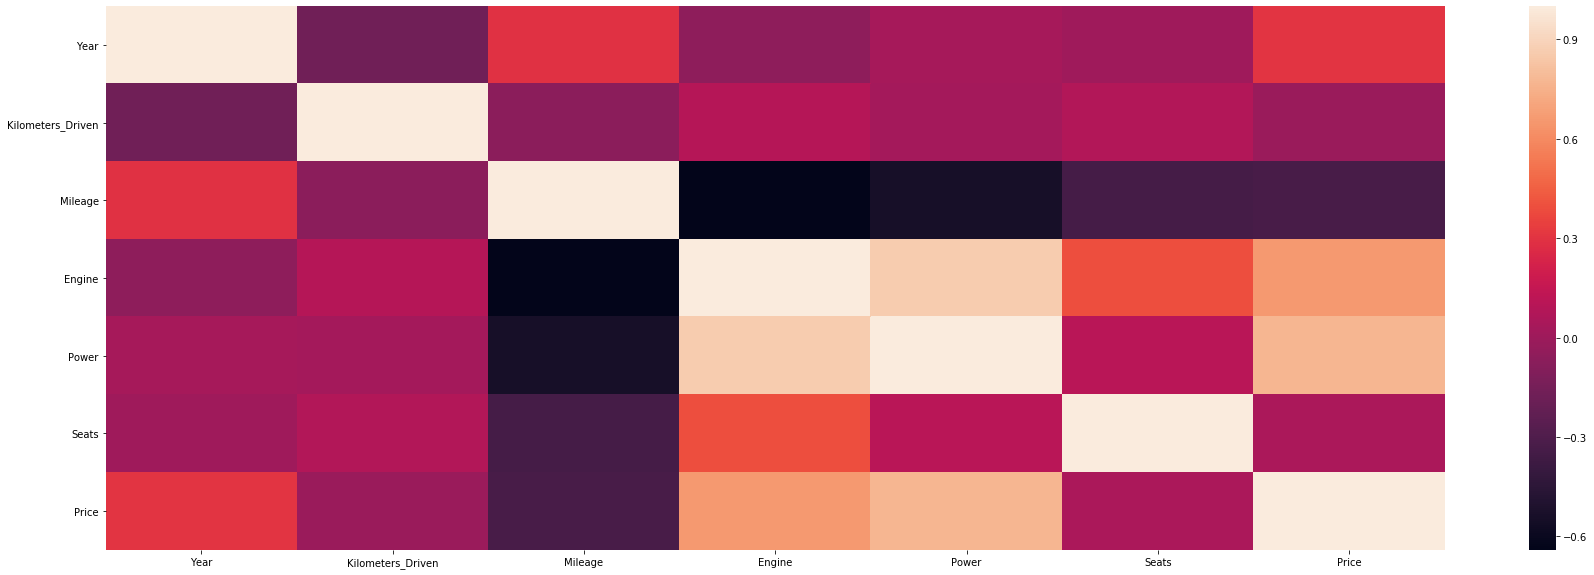

In [57]:
data.corr()
sns.heatmap(data.corr())

In [58]:
data['Fuel_Type'].value_counts()

Diesel      3197
Petrol      2718
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [59]:
#label encoding the Fuel_Type which results in int values for each type of fuel

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

labelenc=le.fit_transform(data['Fuel_Type'])
print(labelenc)

labelenc=labelenc.reshape(len(labelenc),1)

#one hot encoding the resulting int values

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(labelenc)

print(onehot_encoded)

#creating a new dataframe

df=pd.DataFrame(onehot_encoded,columns=["Fuel_Type_CNG","Fuel_Type_Diesel","Fuel_Type_Electric","Fuel_Type_LPG","Fuel_Type_Petrol"])
df


[0 1 4 ... 1 4 1]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


C:\Users\prem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [60]:
#inserting the columns from above dataframe keeping petrol as the default Fuel type

data.insert(4,value=df["Fuel_Type_CNG"], column="Fuel_Type_CNG")
data.insert(5,value=df["Fuel_Type_Diesel"], column="Fuel_Type_Diesel")
data.insert(6,value=df["Fuel_Type_Electric"], column="Fuel_Type_Electric")
data.insert(7,value=df["Fuel_Type_LPG"], column="Fuel_Type_LPG")

data.drop("Fuel_Type", inplace= True, axis=1)
data.head(10)

,Name,Comp_name,Location,Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,1.0,0.0,0.0,0.0,72000,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,0.0,1.0,0.0,0.0,41000,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,0.0,0.0,0.0,0.0,46000,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,0.0,1.0,0.0,0.0,87000,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,0.0,1.0,0.0,0.0,40670,Automatic,Second,15.20,1968,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyundai,Hyderabad,2012,0.0,0.0,0.0,1.0,75000,Manual,First,21.10,814,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Nissan,Jaipur,2013,0.0,1.0,0.0,0.0,86999,Manual,First,23.08,1461,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Toyota,Mumbai,2016,0.0,1.0,0.0,0.0,36000,Automatic,First,11.36,2755,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Volkswagen,Pune,2013,0.0,1.0,0.0,0.0,64430,Manual,First,20.54,1598,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Tata,Chennai,2012,0.0,1.0,0.0,0.0,65932,Manual,Second,22.30,1248,74.00,5.0,1.95


In [61]:
data['Transmission'].value_counts()

Manual       4271
Automatic    1712
Name: Transmission, dtype: int64

In [62]:
#label encoding  the Transmission which results in int values for each type

labelenc=le.fit_transform(data['Transmission'])
print(labelenc)

labelenc=labelenc.reshape(len(labelenc),1)

#one hot encoding the resulting int values

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(labelenc)

print(onehot_encoded)

#creating a new dataframe

df=pd.DataFrame(onehot_encoded,columns=['Automatic','Manual'])
df


[1 1 1 ... 1 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\prem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Automatic,Manual
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


In [63]:
#inserting the columns from above dataframe 
# inserting only  the Manual column since there are only two types in Transmission,the other one is understood 

data.insert(9,value=df["Manual"], column="Transmission_Manual")
data.drop("Transmission", inplace= True, axis=1)
data.head(10)

,Name,Comp_name,Location,Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Kilometers_Driven,Transmission_Manual,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,1.0,0.0,0.0,0.0,72000,1.0,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,0.0,1.0,0.0,0.0,41000,1.0,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,0.0,0.0,0.0,0.0,46000,1.0,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,0.0,1.0,0.0,0.0,87000,1.0,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,0.0,1.0,0.0,0.0,40670,0.0,Second,15.20,1968,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyundai,Hyderabad,2012,0.0,0.0,0.0,1.0,75000,1.0,First,21.10,814,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Nissan,Jaipur,2013,0.0,1.0,0.0,0.0,86999,1.0,First,23.08,1461,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Toyota,Mumbai,2016,0.0,1.0,0.0,0.0,36000,0.0,First,11.36,2755,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Volkswagen,Pune,2013,0.0,1.0,0.0,0.0,64430,1.0,First,20.54,1598,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Tata,Chennai,2012,0.0,1.0,0.0,0.0,65932,1.0,Second,22.30,1248,74.00,5.0,1.95


In [64]:
data['Owner_Type'].value_counts()

First             4907
Second             957
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

In [65]:
#label encoding  the Owner_Type which results in int values for each type

labelenc=le.fit_transform(data['Owner_Type'])
print(labelenc)

labelenc=labelenc.reshape(len(labelenc),1)

#one hot encoding the resulting int values

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(labelenc)

print(onehot_encoded)

#creating a new dataframe

df=pd.DataFrame(onehot_encoded,columns=['First','Fourth_and_above','Second','Third'])
df


[0 0 0 ... 2 0 0]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


C:\Users\prem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,First,Fourth_and_above,Second,Third
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0


In [66]:
#inserting the columns from above dataframe keeping Fourth and Above as default owner type

data.insert(10,value=df["First"], column="Owner_Type_First")
data.insert(11,value=df["Second"], column="Owner_Type_Second")
data.insert(12,value=df["Third"], column="Owner_Type_Third")


data.drop("Owner_Type", inplace= True, axis=1)
data.head(10)

,Name,Comp_name,Location,Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Kilometers_Driven,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,1.0,0.0,0.0,0.0,72000,1.0,1.0,0.0,0.0,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,0.0,1.0,0.0,0.0,41000,1.0,1.0,0.0,0.0,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,0.0,0.0,0.0,0.0,46000,1.0,1.0,0.0,0.0,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,0.0,1.0,0.0,0.0,87000,1.0,1.0,0.0,0.0,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,0.0,1.0,0.0,0.0,40670,0.0,0.0,1.0,0.0,15.20,1968,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyundai,Hyderabad,2012,0.0,0.0,0.0,1.0,75000,1.0,1.0,0.0,0.0,21.10,814,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Nissan,Jaipur,2013,0.0,1.0,0.0,0.0,86999,1.0,1.0,0.0,0.0,23.08,1461,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Toyota,Mumbai,2016,0.0,1.0,0.0,0.0,36000,0.0,1.0,0.0,0.0,11.36,2755,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Volkswagen,Pune,2013,0.0,1.0,0.0,0.0,64430,1.0,1.0,0.0,0.0,20.54,1598,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Tata,Chennai,2012,0.0,1.0,0.0,0.0,65932,1.0,0.0,1.0,0.0,22.30,1248,74.00,5.0,1.95


In [67]:
# checking whether the necessary categorical variables are converted into int/float 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 18 columns):
Name                   5983 non-null object
Comp_name              5983 non-null object
Location               5983 non-null object
Year                   5983 non-null int64
Fuel_Type_CNG          5983 non-null float64
Fuel_Type_Diesel       5983 non-null float64
Fuel_Type_Electric     5983 non-null float64
Fuel_Type_LPG          5983 non-null float64
Kilometers_Driven      5983 non-null int64
Transmission_Manual    5983 non-null float64
Owner_Type_First       5983 non-null float64
Owner_Type_Second      5983 non-null float64
Owner_Type_Third       5983 non-null float64
Mileage                5983 non-null float64
Engine                 5983 non-null int64
Power                  5983 non-null float64
Seats                  5983 non-null float64
Price                  5983 non-null float64
dtypes: float64(12), int64(3), object(3)
memory usage: 1.0+ MB


To Bring All The Diffrent Units Into A Single Unit We Perform Scaling Of The Data. Here, We Will Do The Data Scaling For Kilometers Driven.

In [68]:
data.corr()

,Year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Kilometers_Driven,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Mileage,Engine,Power,Seats,Price
Year,1.000000,0.018458,0.122348,0.000658,-0.032532,-0.172546,-0.096204,0.370948,-0.295518,-0.233148,0.294547,-0.052197,0.034628,0.012319,0.306137
Fuel_Type_CNG,0.018458,1.000000,-0.104126,-0.001777,-0.003977,-0.003440,0.061541,-0.004198,0.004937,-0.000501,0.165382,-0.085712,-0.086179,-0.029222,-0.051897
Fuel_Type_Diesel,0.122348,-0.104126,1.000000,-0.019589,-0.043831,0.105067,-0.138043,0.039224,-0.025933,-0.042990,0.110144,0.428138,0.291779,0.308575,0.319368
Fuel_Type_Electric,0.000658,-0.001777,-0.019589,1.000000,-0.000748,-0.002335,-0.028883,0.008563,-0.007979,-0.002514,-0.005874,-0.020870,-0.018938,-0.006305,0.005517
Fuel_Type_LPG,-0.032532,-0.003977,-0.043831,-0.000748,1.000000,0.000573,0.025905,-0.002148,0.004470,-0.005626,0.010305,-0.040412,-0.040152,-0.014109,-0.025608
Kilometers_Driven,-0.172546,-0.003440,0.105067,-0.002335,0.000573,1.000000,0.025726,-0.078134,0.062098,0.045200,-0.064399,0.091068,0.030417,0.083108,-0.011316
Transmission_Manual,-0.096204,0.061541,-0.138043,-0.028883,0.025905,0.025726,1.000000,-0.001821,-0.007224,0.021273,0.361437,-0.500381,-0.643599,0.075446,-0.585939
Owner_Type_First,0.370948,-0.004198,0.039224,0.008563,-0.002148,-0.078134,-0.001821,1.000000,-0.931851,-0.293610,0.145113,-0.049441,-0.022339,-0.003874,0.092046
Owner_Type_Second,-0.295518,0.004937,-0.025933,-0.007979,0.004470,0.062098,-0.007224,-0.931851,1.000000,-0.059995,-0.118889,0.042653,0.025575,-0.004870,-0.073939
Owner_Type_Third,-0.233148,-0.000501,-0.042990,-0.002514,-0.005626,0.045200,0.021273,-0.293610,-0.059995,1.000000,-0.079664,0.019284,-0.003795,0.012351,-0.055726


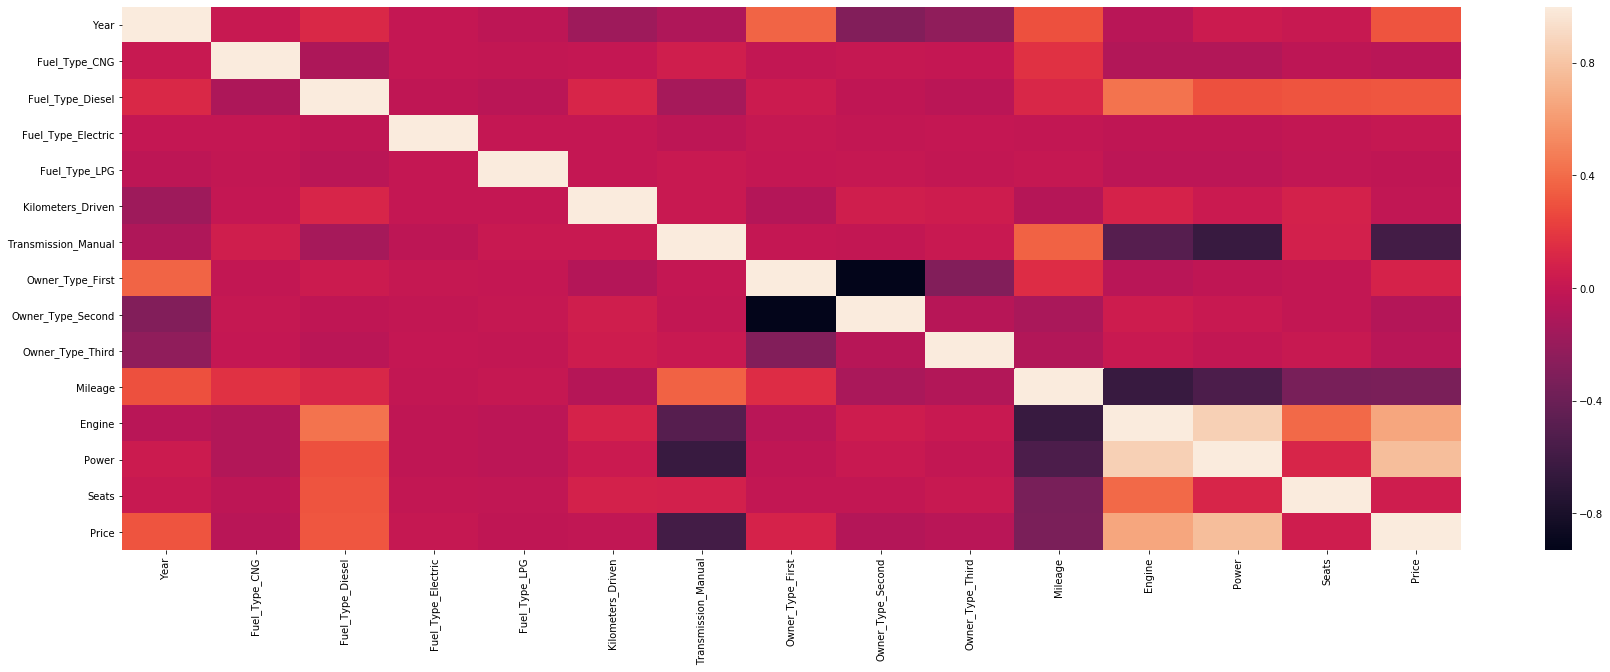

In [69]:
sns.heatmap(data.corr())

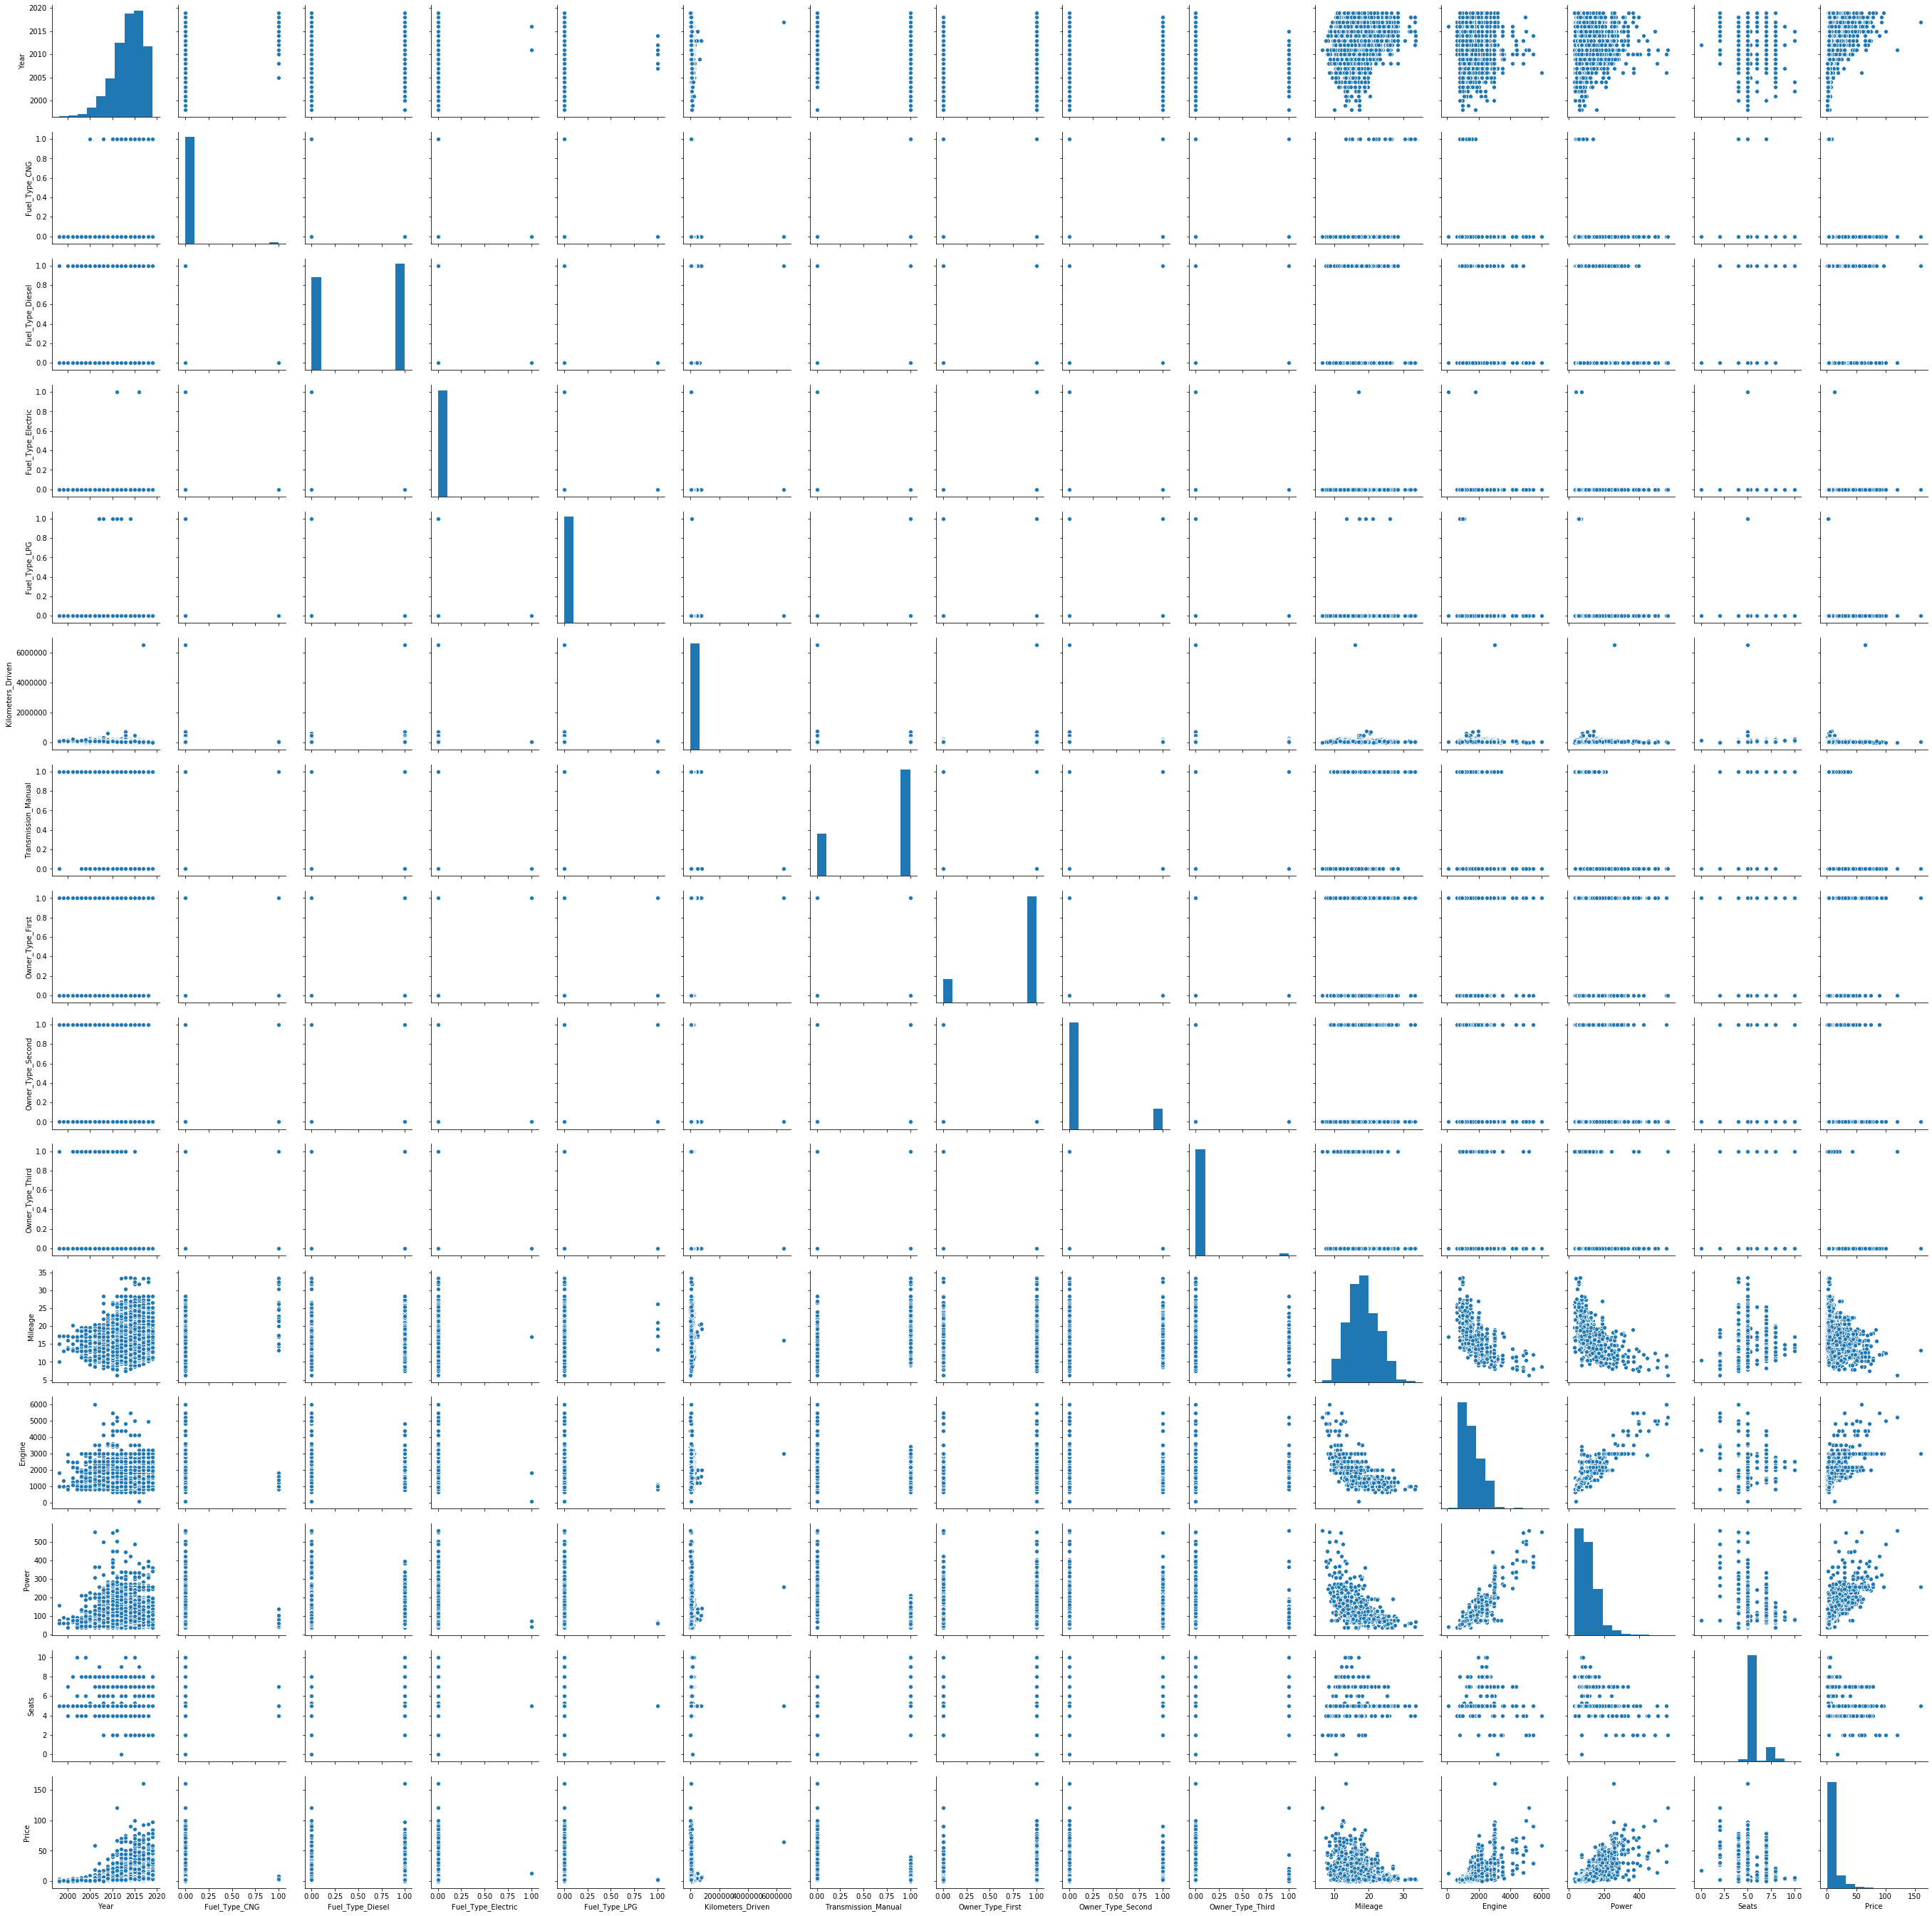

In [70]:
sns.pairplot(data)

In [71]:
# STANDARDIZATION METHOD HAS BEEN USED FOR DATASCALING

from sklearn.preprocessing import StandardScaler

In [72]:
scaling=StandardScaler()
scaling.fit_transform(data[['Kilometers_Driven']])

array([[ 0.1455349 ],
       [-0.19327885],
       [-0.13863147],
       ...,
       [-0.04026619],
       [-0.13863147],
       [-0.127702  ]])

Adding new data that would help in the predictions. For giving the car brand name a contribution in our model, we are adding the counts and mean of variables Brand name wise to the train data.



In [73]:
X=data.drop(labels=['Price'],axis=1)
y=data['Price'].values
X['Car_Age']= 2019 - X['Year']
X['Location'] = X['Location'].astype('category')
agg_func = {
        'Location' : ['count'],
        'Mileage' : ['mean'],
        'Power' : ['mean'],
        'Engine' : ['mean'] }
    
agg_df = X.groupby(['Name']).agg(agg_func)
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df.reset_index(inplace=True)
    
X = pd.merge(X, agg_df, on='Name', how='left')
X.drop(['Name','Comp_name'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 5982
Data columns (total 20 columns):
Location               5983 non-null category
Year                   5983 non-null int64
Fuel_Type_CNG          5983 non-null float64
Fuel_Type_Diesel       5983 non-null float64
Fuel_Type_Electric     5983 non-null float64
Fuel_Type_LPG          5983 non-null float64
Kilometers_Driven      5983 non-null int64
Transmission_Manual    5983 non-null float64
Owner_Type_First       5983 non-null float64
Owner_Type_Second      5983 non-null float64
Owner_Type_Third       5983 non-null float64
Mileage                5983 non-null float64
Engine                 5983 non-null int64
Power                  5983 non-null float64
Seats                  5983 non-null float64
Car_Age                5983 non-null int64
Location_count         5983 non-null int64
Mileage_mean           5983 non-null float64
Power_mean             5983 non-null float64
Engine_mean            5983 non-null float64
dt

Then, To Check The Model Accuracy Some Datas Will Be Needed For Prediction. Hence, We Will Split Our Data Into Train Data And Test Data.


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.30,random_state=1)

In [75]:
X_train.shape,y_train.shape,X_cv.shape,y_cv.shape

((4188, 20), (4188,), (1795, 20), (1795,))

We used a multiple linear regression model, which we optimized using backward elimination method. If the p-value of an independent variable crosses 0.05, we have omitted the column and not used it as the predictor variables.


In [76]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error


Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks. We optimised this algorithm using backward elimination method. Those variables with negligible importance to the LGBM model have been removed as independent variables from the train dataset.

In [77]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))
print(y_pred_lgbm)
print(y_cv)

C:\Users\prem\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 3.30689
[200]	valid_0's rmse: 3.24601
[300]	valid_0's rmse: 3.21558
[400]	valid_0's rmse: 3.20935
Early stopping, best iteration is:
[383]	valid_0's rmse: 3.20654
RMSLE: 3.206542543756919
[ 5.24826254  3.72692326 10.97391946 ...  3.28975117  2.29830237
  3.65656594]
[ 5.    4.1  10.2  ...  3.49  2.35  3.55]


We see that the predictions resemble a similar trend when compared to the actual prices.

In [78]:
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

def rmse(y1,y_hat):
    y_actual=np.array(y1)
    y_predict=np.array(y_hat)
    error= (y_actual-y_predict)**2
    return np.sqrt(np.mean(error))

Calculaing error metrics:

In [79]:
print("MSE: ",mean_squared_error(y_cv,y_pred_lgbm))
print("RMSE: ", rmse(y_cv,y_pred_lgbm))
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))
print('RMSLE:', sqrt(mean_squared_log_error(y_cv,y_pred_lgbm)))
print("R2 score accuracy: ", r2_score(y_cv,y_pred_lgbm))

MSE:  10.28191508492309
RMSE:  3.206542543756919
RMSLE: 3.206542543756919
RMSLE: 0.18962388391121487
R2 score accuracy:  0.9153183253060632


Accuracy measured in R2 score: 0.9153 or 91.53%.

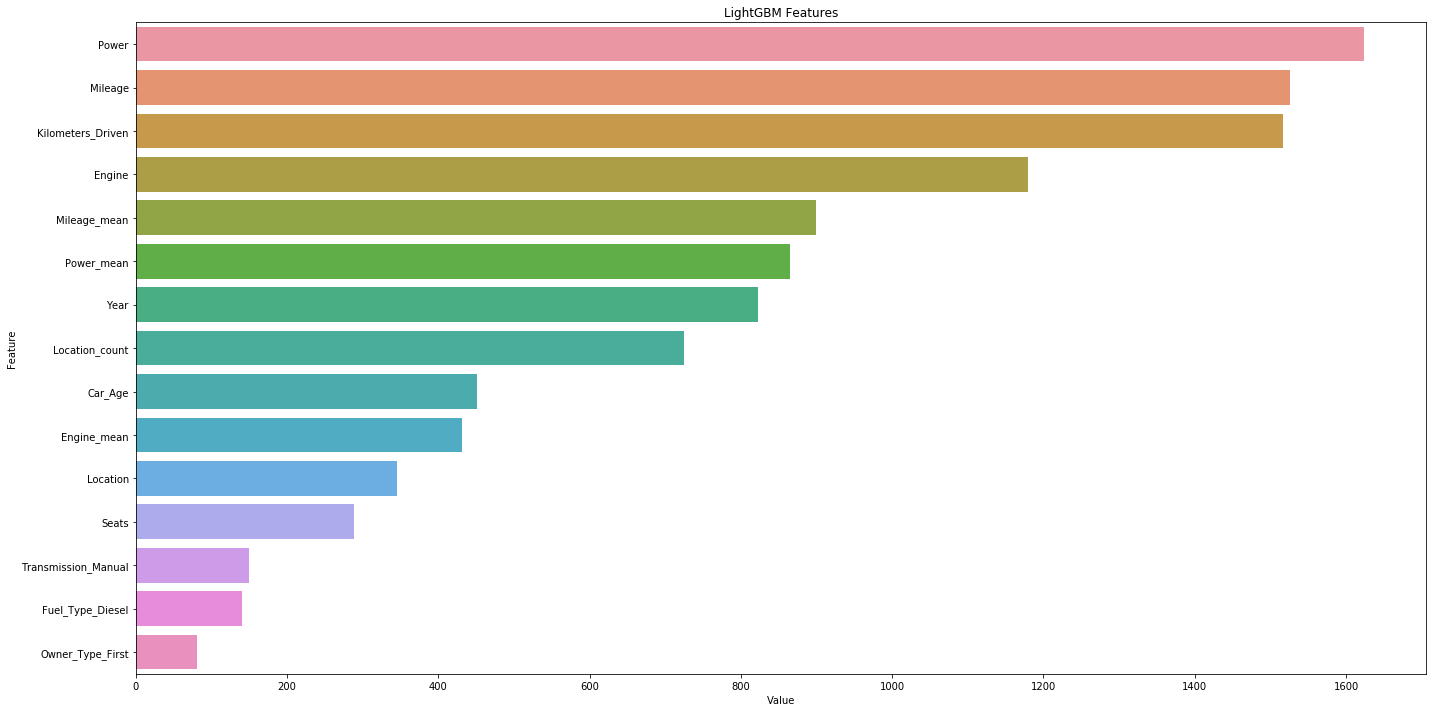

In [80]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [81]:
df_submission = pd.DataFrame(data=y_pred_lgbm, columns=['PriceInLakhsINR'])
writer = pd.ExcelWriter('Output.xlsx', engine='xlsxwriter')
df_submission.to_excel(writer,sheet_name='Sheet', index=False)
writer.save()

In [82]:
df_submission.shape

(1795, 1)

In [83]:
df_submission.head(20)

,PriceInLakhsINR
0,5.248263
1,3.726923
2,10.973919
3,6.094974
4,3.237905
5,6.824104
6,15.970427
7,37.255753
8,10.926727
9,3.845468
